In [106]:
import json
import xml.etree.ElementTree as ET
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import re
import numpy as np

# **1. Reading Data**

## **1. Read JASON file**

In [5]:
with open('experiments.json', 'r') as file:
    json_file_data = json.load(file)

print(json_file_data[0])

{'experiment_id': 'E123', 'description': 'Growth rate of plants under different light conditions', 'results': {'control': '0.2 cm/day', 'test': '0.5 cm/day', 'growth_index': 2.5}, 'metadata': {'date': '2023-01-15', 'researcher': 'Dr. Green', 'location': 'Lab A'}}


## **2. Read XML file**

In [6]:
# Load the XML file
tree = ET.parse('experiments.xml')  # Replace with your XML file path
root = tree.getroot()

# List to store each experiment's dictionary
experiments_list = []

# Iterate through each experiment
for experiment in root.findall('experiment'):
    # Dictionary to hold the experiment data
    experiment_data = {}

    # Extracting experiment details
    experiment_data['experiment_id'] = experiment.find('experiment_id').text
    experiment_data['description'] = experiment.find('description').text

    # Extracting results
    experiment_data['control_result'] = experiment.find('results/control').text
    experiment_data['test_result'] = experiment.find('results/test').text

    # Extract specific metric name and value
    specific_metric = next(((elem.tag, elem.text) for elem in experiment.find('results') if elem.tag not in ['control', 'test']), (None, None))
    specific_metric_name, specific_metric_value = specific_metric

    # Save the specific metric if it exists
    if specific_metric_name:
        experiment_data['Metric_Name'] = specific_metric_name
        experiment_data['Metric_Value'] = specific_metric_value

    # Extracting metadata
    experiment_data['date'] = experiment.find('metadata/date').text
    experiment_data['researcher'] = experiment.find('metadata/researcher').text
    experiment_data['location'] = experiment.find('metadata/location').text

    # Append the experiment dictionary to the list
    experiments_list.append(experiment_data)
    xml_file_data = experiments_list

In [7]:
print(xml_file_data[0])

{'experiment_id': 'E129', 'description': 'Analysis of chemical reaction rates at different temperatures', 'control_result': 'Slow reaction', 'test_result': 'Rapid reaction at 60°C', 'Metric_Name': 'reaction_time', 'Metric_Value': '15 mins', 'date': '2023-07-15', 'researcher': 'Dr. Orange', 'location': 'Lab E'}


# **Combine Data**

In [10]:
xml_df = pd.DataFrame(xml_file_data)
xml_df.head()

experiment_id                                        description  \
0          E129  Analysis of chemical reaction rates at differe...   
1          E130       Testing different water purification methods   
2          E131  Effects of varying light intensities on solar ...   
3          E132  Comparative study of different insulation mate...   
4          E133  Impact of different exercise regimes on cardio...   

         control_result                                        test_result  \
0         Slow reaction                             Rapid reaction at 60°C   
1  0.5 ppm contaminants               0.1 ppm contaminants with new method   
2        80% efficiency                   90% efficiency at high intensity   
3   Standard insulation      Improved thermal resistance with new material   
4  Moderate improvement  Significant improvement with high-intensity tr...   

          Metric_Name Metric_Value        date  researcher location  
0       reaction_time      15 mins  2023-07-15  Dr. Orange    Lab E  
1     purity_increase          80%  08/05/2023  Dr. Purple    Lab F  
2     efficiency_gain          10%  2023-09-20    Dr. Gray  Field B  
3  thermal_resistance         High  2023-10-10   Dr. Brown    Lab G  
4  heart_health_index          4.2  2023-11-05    Dr. Pink    Lab H

Prepare json file to be saved as a dictionary

In [12]:
flattened_data = []
for experiment in json_file_data:
    flattened_experiment = {
        'experiment_id': experiment['experiment_id'],
        'description': experiment['description'],
        'control_result': experiment['results'].get('control', ''),
        'test_result': experiment['results'].get('test', ''),
        'date': experiment['metadata']['date'],
        'researcher': experiment['metadata']['researcher'],
        'location': experiment['metadata']['location']
    }

    results = experiment['results']
    metric_names = [key for key in results if key not in ['control', 'test']]
    if metric_names:
        metric_name = metric_names[0]
        metric_value = results.get(metric_name, '')
        flattened_experiment['Metric_Name'] = metric_name
        flattened_experiment['Metric_Value'] = metric_value
    else:
        flattened_experiment['Metric_Name'] = ''
        flattened_experiment['Metric_Value'] = ''

    flattened_data.append(flattened_experiment)

json_data = flattened_data
json_df = pd.DataFrame(json_data)

json_df.head()

experiment_id                                        description  \
0          E123  Growth rate of plants under different light co...   
1          E124           Effect of temperature on enzyme activity   
2          E125   Study of microbial growth in different pH levels   
3          E126  Comparison of fuel efficiency in hybrid vs. el...   
4          E127             Effect of various diets on weight loss   

   control_result                test_result            date  researcher  \
0      0.2 cm/day                 0.5 cm/day      2023-01-15   Dr. Green   
1     No activity  Incresed activity at 37°C        02/10/23    Dr. Blue   
2  Neutral growth                                 2023-03-12     Dr. Red   
3          20 mpg                     50 mpg  April 22, 2023  Dr. Yellow   
4       1 kg/week                2.5 kg/week      2023/05/18   Dr. White   

  location                Metric_Name Metric_Value  
0    Lab A               growth_index          2.5  
1    Lab B  temperature_effectiveness          0.8  
2    Lab C                growth_rate         None  
3  Field A        efficiency_increase          30%  
4    Lab D          weight_loss_ratio          2.5

combine the 2 dataframes

In [14]:
combined_df = pd.concat([xml_df, json_df])
combined_df = combined_df.reset_index(drop=True)
combined_df

experiment_id                                        description  \
0           E129  Analysis of chemical reaction rates at differe...   
1           E130       Testing different water purification methods   
2           E131  Effects of varying light intensities on solar ...   
3           E132  Comparative study of different insulation mate...   
4           E133  Impact of different exercise regimes on cardio...   
5           E134  Study on the durability of new construction ma...   
6           E135     Effects of different fertilizers on crop yield   
7           E136  Study of air quality improvements using differ...   
8           E137        Effects of UV radiation on bacterial growth   
9           E138  Comparison of battery life in different smartp...   
10          E139  Impact of different teaching methods on studen...   
11          E123  Growth rate of plants under different light co...   
12          E124           Effect of temperature on enzyme activity   
13          E125   Study of microbial growth in different pH levels   
14          E126  Comparison of fuel efficiency in hybrid vs. el...   
15          E127             Effect of various diets on weight loss   
16          E128  Impact of water hardness on detergent effectiv...   
17          E129  Analysis of chemical reaction rates at differe...   
18          E130       Testing different water purification methods   
19          E131  Effects of varying light intensities on solar ...   
20          E132  Comparative study of different insulation mate...   
21          E133  Impact of different exercise regimes on cardio...   
22          E134  Study on the durability of new construction ma...   
23          E135     Effects of different fertilizers on crop yield   

              control_result  \
0              Slow reaction   
1       0.5 ppm contaminants   
2             80% efficiency   
3        Standard insulation   
4       Moderate improvement   
5                    5 years   
6                500 kg/acre   
7     PM2.5 reduction by 30%   
8    Bacterial growth normal   
9   Battery life of 10 hours   
10      Moderate improvement   
11                0.2 cm/day   
12               No activity   
13            Neutral growth   
14                    20 mpg   
15                 1 kg/week   
16         50% stain removal   
17             Slow reaction   
18      0.5 ppm contaminants   
19            80% efficiency   
20       Standard insulation   
21      Moderate improvement   
22                   5 years   
23               500 kg/acre   

                                          test_result  \
0                              Rapid reaction at 60°C   
1                0.1 ppm contaminants with new method   
2                    90% efficiency at high intensity   
3       Improved thermal resistance with new material   
4   Significant improvement with high-intensity tr...   
5                                            10 years   
6                                         700 kg/acre   
7              PM2.5 reduction by 60% with new system   
8                     Bacterial growth reduced by 75%   
9                            Battery life of 15 hours   
10  Significant improvement with interactive learning   
11                                         0.5 cm/day   
12                          Incresed activity at 37°C   
13                                                      
14                                             50 mpg   
15                                        2.5 kg/week   
16                                  80% stain removal   
17                             Rapid reaction at 60°C   
18               0.1 ppm contaminants with new method   
19                   90% efficiency at high intensity   
20      Improved thermal resistance with new material   
21  Significant improvement with high-intensity tr...   
22                                           10 years   
23                                        700 kg/acre   



# **Data Cleaning and Handling**

Dublicates Removal

In [15]:
duplicates_specific = combined_df[combined_df.duplicated(subset=['experiment_id'])]
print(duplicates_specific['experiment_id'])

cleaned_df = combined_df.drop_duplicates(subset=['experiment_id'], keep='first')
cleaned_df = cleaned_df.sort_values(by='experiment_id')
cleaned_df = cleaned_df.reset_index(drop=True)
cleaned_df

17    E129
18    E130
19    E131
20    E132
21    E133
22    E134
23    E135
Name: experiment_id, dtype: object


experiment_id                                        description  \
0           E123  Growth rate of plants under different light co...   
1           E124           Effect of temperature on enzyme activity   
2           E125   Study of microbial growth in different pH levels   
3           E126  Comparison of fuel efficiency in hybrid vs. el...   
4           E127             Effect of various diets on weight loss   
5           E128  Impact of water hardness on detergent effectiv...   
6           E129  Analysis of chemical reaction rates at differe...   
7           E130       Testing different water purification methods   
8           E131  Effects of varying light intensities on solar ...   
9           E132  Comparative study of different insulation mate...   
10          E133  Impact of different exercise regimes on cardio...   
11          E134  Study on the durability of new construction ma...   
12          E135     Effects of different fertilizers on crop yield   
13          E136  Study of air quality improvements using differ...   
14          E137        Effects of UV radiation on bacterial growth   
15          E138  Comparison of battery life in different smartp...   
16          E139  Impact of different teaching methods on studen...   

              control_result  \
0                 0.2 cm/day   
1                No activity   
2             Neutral growth   
3                     20 mpg   
4                  1 kg/week   
5          50% stain removal   
6              Slow reaction   
7       0.5 ppm contaminants   
8             80% efficiency   
9        Standard insulation   
10      Moderate improvement   
11                   5 years   
12               500 kg/acre   
13    PM2.5 reduction by 30%   
14   Bacterial growth normal   
15  Battery life of 10 hours   
16      Moderate improvement   

                                          test_result  \
0                                          0.5 cm/day   
1                           Incresed activity at 37°C   
2                                                       
3                                              50 mpg   
4                                         2.5 kg/week   
5                                   80% stain removal   
6                              Rapid reaction at 60°C   
7                0.1 ppm contaminants with new method   
8                    90% efficiency at high intensity   
9       Improved thermal resistance with new material   
10  Significant improvement with high-intensity tr...   
11                                           10 years   
12                                        700 kg/acre   
13             PM2.5 reduction by 60% with new system   
14                    Bacterial growth reduced by 75%   
15                           Battery life of 15 hours   
16  Significant improvement with interactive learning   

                  Metric_Name Metric_Value            date   researcher  \
0                growth_index          2.5      2023-01-15    Dr. Green   
1   temperature_effectiveness          0.8        02/10/23     Dr. Blue   
2                 growth_rate         None      2023-03-12      Dr. Red   
3         efficiency_increase          30%  April 22, 2023   Dr. Yellow   
4           weight_loss_ratio          2.5      2023/05/18    Dr. White   
5          effectiveness_gain           30      2023-06-22    Dr. Black   
6               reaction_time      15 mins      2023-07-15   Dr. Orange   
7             purity_increase          80%      08/05/2023   Dr. Purple   
8             efficiency_gain          10%      2023-09-20     Dr. Gray   
9          thermal_resistance         High      2023-10-10    Dr. Brown   
10         heart_health_index          4.2      2023-11-05     Dr. Pink   
11        durability_increase            5      2023-12-12   Dr. Silver   
12             yield_increase          40%      2023-12-18     Dr. Gold   
13          air_quality_index            2      2023-08-20     Dr. Cya

Remove Null/missing data

In [21]:
null_or_empty_counts = (cleaned_df.isnull() | (cleaned_df == '')).sum()
print(null_or_empty_counts)
rows_with_null_or_empty = cleaned_df[(cleaned_df.isnull() | (cleaned_df == '')).any(axis=1)]
print(rows_with_null_or_empty['experiment_id'])
cleaned_removed_df = cleaned_df.dropna()
cleaned_removed_df = cleaned_removed_df.reset_index(drop=True)
cleaned_removed_df.columns = cleaned_removed_df.columns.str.lower()
cleaned_removed_df.head()

experiment_id     0
description       0
control_result    0
test_result       1
Metric_Name       0
Metric_Value      1
date              0
researcher        0
location          0
dtype: int64
2    E125
Name: experiment_id, dtype: object


experiment_id                                        description  \
0          E123  Growth rate of plants under different light co...   
1          E124           Effect of temperature on enzyme activity   
2          E126  Comparison of fuel efficiency in hybrid vs. el...   
3          E127             Effect of various diets on weight loss   
4          E128  Impact of water hardness on detergent effectiv...   

      control_result                test_result                metric_name  \
0         0.2 cm/day                 0.5 cm/day               growth_index   
1        No activity  Incresed activity at 37°C  temperature_effectiveness   
2             20 mpg                     50 mpg        efficiency_increase   
3          1 kg/week                2.5 kg/week          weight_loss_ratio   
4  50% stain removal          80% stain removal         effectiveness_gain   

  metric_value            date  researcher location  
0          2.5      2023-01-15   Dr. Green    Lab A  
1          0.8        02/10/23    Dr. Blue    Lab B  
2          30%  April 22, 2023  Dr. Yellow  Field A  
3          2.5      2023/05/18   Dr. White    Lab D  
4           30      2023-06-22   Dr. Black    Lab E

Normalize data column

In [22]:
for index, row in cleaned_removed_df.iterrows():
    date_object = pd.to_datetime(row['date'], errors='coerce')
    if pd.notna(date_object):
        formatted_date = date_object.strftime("%Y-%m-%d")
        cleaned_removed_df.at[index, 'date'] = formatted_date

In [23]:
cleaned_removed_df

experiment_id                                        description  \
0           E123  Growth rate of plants under different light co...   
1           E124           Effect of temperature on enzyme activity   
2           E126  Comparison of fuel efficiency in hybrid vs. el...   
3           E127             Effect of various diets on weight loss   
4           E128  Impact of water hardness on detergent effectiv...   
5           E129  Analysis of chemical reaction rates at differe...   
6           E130       Testing different water purification methods   
7           E131  Effects of varying light intensities on solar ...   
8           E132  Comparative study of different insulation mate...   
9           E133  Impact of different exercise regimes on cardio...   
10          E134  Study on the durability of new construction ma...   
11          E135     Effects of different fertilizers on crop yield   
12          E136  Study of air quality improvements using differ...   
13          E137        Effects of UV radiation on bacterial growth   
14          E138  Comparison of battery life in different smartp...   
15          E139  Impact of different teaching methods on studen...   

              control_result  \
0                 0.2 cm/day   
1                No activity   
2                     20 mpg   
3                  1 kg/week   
4          50% stain removal   
5              Slow reaction   
6       0.5 ppm contaminants   
7             80% efficiency   
8        Standard insulation   
9       Moderate improvement   
10                   5 years   
11               500 kg/acre   
12    PM2.5 reduction by 30%   
13   Bacterial growth normal   
14  Battery life of 10 hours   
15      Moderate improvement   

                                          test_result  \
0                                          0.5 cm/day   
1                           Incresed activity at 37°C   
2                                              50 mpg   
3                                         2.5 kg/week   
4                                   80% stain removal   
5                              Rapid reaction at 60°C   
6                0.1 ppm contaminants with new method   
7                    90% efficiency at high intensity   
8       Improved thermal resistance with new material   
9   Significant improvement with high-intensity tr...   
10                                           10 years   
11                                        700 kg/acre   
12             PM2.5 reduction by 60% with new system   
13                    Bacterial growth reduced by 75%   
14                           Battery life of 15 hours   
15  Significant improvement with interactive learning   

                  metric_name metric_value        date   researcher  location  
0                growth_index          2.5  2023-01-15    Dr. Green     Lab A  
1   temperature_effectiveness          0.8  2023-02-10     Dr. Blue     Lab B  
2         efficiency_increase          30%  2023-04-22   Dr. Yellow   Field A  
3           weight_loss_ratio          2.5  2023-05-18    Dr. White     Lab D  
4          effectiveness_gain           30  2023-06-22    Dr. Black     Lab E  
5               reaction_time      15 mins  2023-07-15   Dr. Orange     Lab E  
6             purity_increase          80%  2023-08-05   Dr. Purple     Lab F  
7             efficiency_gain          10%  2023-09-20     Dr. Gray   Field B  
8          thermal_resistance         High  2023-10-10    Dr. Brown     Lab G  
9          heart_health_index          4.2  2023-11-05     Dr. Pink     Lab H  
10        durability_increase            5  2023-12-12   Dr. Silver    Site A  
11             yield_increase          40%  2023-12-18     Dr. Gold   Field C  
12          air_quality_index            2  2023-08-20     Dr. Cyan     Lab J  
13  bacterial_reduction_index            3  2023-09-15  Dr. Magenta     Lab K  
14          battery_life_gain          50%  2023-11-25   Dr. Violet     Lab L  


# **Data Transformation**

## 1. transform the dataframe into a CSV file format






In [31]:
cleaned_removed_df.to_csv('experiment_table.csv', index=False)

## 2. transform the dataframe into a relational database format

In [25]:
engine = create_engine('sqlite:///experiment_data.db')
cleaned_removed_df.to_sql('experiment_table', con=engine, index=False, if_exists='replace')

16

Read the database file

In [29]:
df_from_db = pd.read_sql('experiment_table', con=engine)
df_from_db.head()

experiment_id                                        description  \
0          E123  Growth rate of plants under different light co...   
1          E124           Effect of temperature on enzyme activity   
2          E126  Comparison of fuel efficiency in hybrid vs. el...   
3          E127             Effect of various diets on weight loss   
4          E128  Impact of water hardness on detergent effectiv...   

      control_result                test_result                metric_name  \
0         0.2 cm/day                 0.5 cm/day               growth_index   
1        No activity  Incresed activity at 37°C  temperature_effectiveness   
2             20 mpg                     50 mpg        efficiency_increase   
3          1 kg/week                2.5 kg/week          weight_loss_ratio   
4  50% stain removal          80% stain removal         effectiveness_gain   

  metric_value        date  researcher location  
0          2.5  2023-01-15   Dr. Green    Lab A  
1          0.8  2023-02-10    Dr. Blue    Lab B  
2          30%  2023-04-22  Dr. Yellow  Field A  
3          2.5  2023-05-18   Dr. White    Lab D  
4           30  2023-06-22   Dr. Black    Lab E

close connection

In [30]:
engine.dispose()

# **Data Analysis**

Experiments done by each Department

In [33]:
Lab_Department = 0
Field_Department = 0
Site_Department = 0
School_Department = 0

for location in cleaned_removed_df['location']:
    if 'Lab' in location:
        Lab_Department += 1
    if 'Field' in location:
        Field_Department += 1
    if 'Site' in location:
        Site_Department += 1
    if 'School' in location:
        School_Department += 1

print("Lab Department:", Lab_Department)
print("Field Department:", Field_Department)
print("Site Department:", Site_Department)
print("School Department:", School_Department)

Lab Department: 11
Field Department: 3
Site Department: 1
School Department: 1


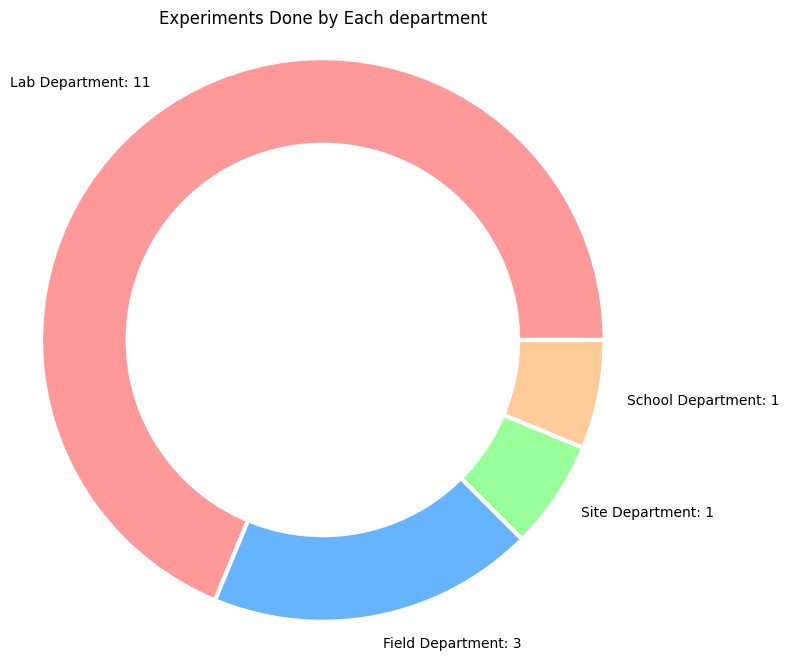

In [94]:
# Data for the donut chart
sizes = [Lab_Department, Field_Department, Site_Department, School_Department]
labels = [f"Lab Department: {Lab_Department}", f'Field Department: {Field_Department}', f'Site Department: {Site_Department}', f'School Department: {School_Department}']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

plt.figure(figsize=(8,8))
plt.pie(sizes, labels=labels, colors=colors, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.title("Experiments Done by Each department")
plt.savefig('donut_chart.png')
plt.show()

Experiments done by each location

In [41]:
location_count_map = cleaned_removed_df['location'].value_counts().to_dict()
location_count_map

{'Lab E': 2,
 'Lab A': 1,
 'Lab B': 1,
 'Field A': 1,
 'Lab D': 1,
 'Lab F': 1,
 'Field B': 1,
 'Lab G': 1,
 'Lab H': 1,
 'Site A': 1,
 'Field C': 1,
 'Lab J': 1,
 'Lab K': 1,
 'Lab L': 1,
 'School A': 1}

<ipython-input-95-ac1814cc30b7>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(locations, experiments, basefmt=" ", use_line_collection=True)


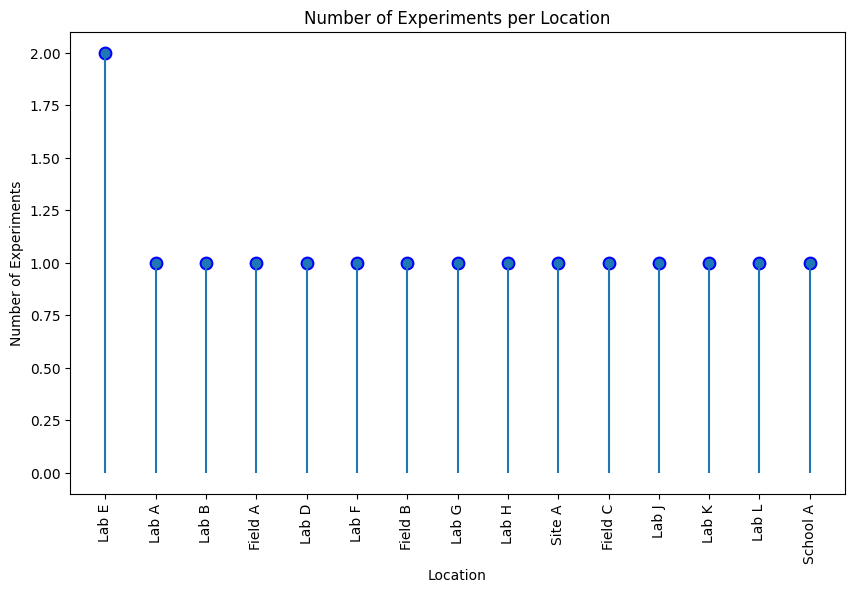

In [95]:
locations = list(location_count_map.keys())
experiments = list(location_count_map.values())

plt.figure(figsize=(10, 6))

plt.stem(locations, experiments, basefmt=" ", use_line_collection=True)

plt.scatter(locations, experiments, color='blue', s=80)

plt.xlabel('Location')
plt.ylabel('Number of Experiments')
plt.title('Number of Experiments per Location')
plt.savefig('lollipop_chart.png')
plt.xticks(rotation=90)

plt.show()

Effeciency increase in some experiments

In [102]:
def extract_float(text):
    match = re.search(r'(\d+\.\d+|\d+)', text)
    return float(match.group()) if match else None


keywords = ['index', 'ratio', 'gain', 'increase']

# Initialize lists to store extracted data
experiment_ids = []
before_values = []
after_values = []
metric = []

# Iterate over each row in the DataFrame
for index, row in cleaned_removed_df.iterrows():
    # Check if the metric_name contains any of the keywords
    if any(keyword in row['metric_name'].lower() for keyword in keywords) or '%' in str(row['metric_value']):
        before_value = extract_float(row['control_result'])
        if before_value is None:
          continue
        after_value = extract_float(row['test_result'])
        if after_value is None:
          continue
        before_values.append(before_value)
        after_values.append(after_value)
        experiment_ids.append(row['experiment_id'])
        text = row['experiment_id'] + '\n' + row['metric_name'] + " by " + str(row['metric_value']) + '\n' + ' by ' + str(row['researcher']) + ' / ' + str(row['location'])
        metric.append(text)

# Print the extracted data (for verification)
print("Experiment IDs:", experiment_ids)
print("Before values (control_result):", before_values)
print("After values (test_result):", after_values)

Experiment IDs: ['E123', 'E126', 'E127', 'E128', 'E130', 'E131', 'E134', 'E135', 'E136', 'E138']
Before values (control_result): [0.2, 20.0, 1.0, 50.0, 0.5, 80.0, 5.0, 500.0, 2.5, 10.0]
After values (test_result): [0.5, 50.0, 2.5, 80.0, 0.1, 90.0, 10.0, 700.0, 2.5, 15.0]


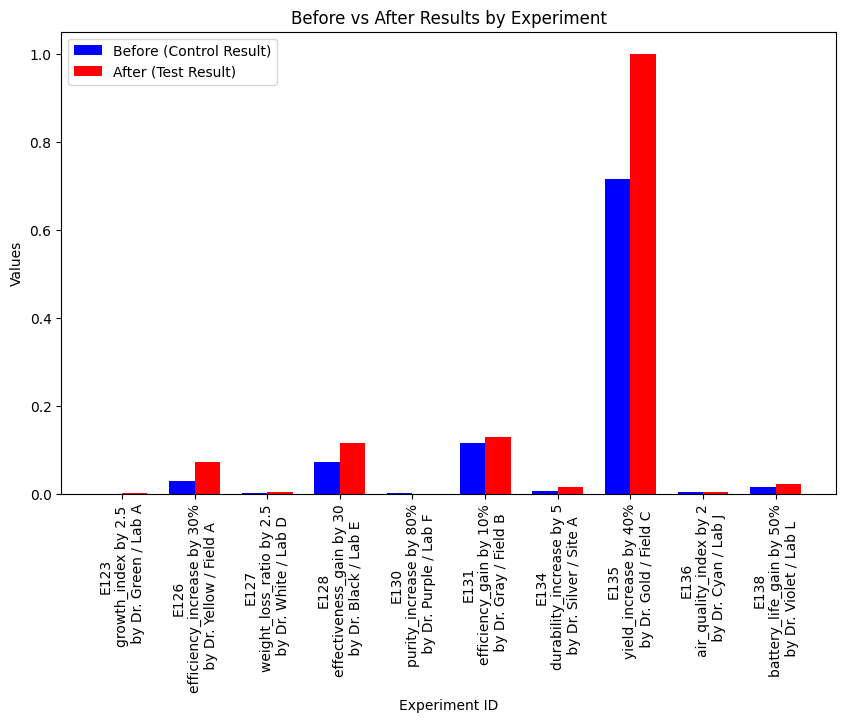

In [104]:
min_value = min(min(before_values), min(after_values))
max_value = max(max(before_values), max(after_values))

before_values_normalized = [(val - min_value) / (max_value - min_value) for val in before_values]
after_values_normalized = [(val - min_value) / (max_value - min_value) for val in after_values]

n_experiments = len(experiment_ids)

bar_width = 0.35
index = np.arange(n_experiments)

plt.figure(figsize=(10, 6))
plt.bar(index, before_values_normalized, bar_width, label='Before (Control Result)', color='b')
plt.bar(index + bar_width, after_values_normalized, bar_width, label='After (Test Result)', color='r')

plt.xlabel('Experiment ID')
plt.ylabel('Values')
plt.title('Before vs After Results by Experiment')
plt.xticks(index + bar_width / 2, metric, rotation=90)
plt.legend()
plt.savefig('grouped_bar_chart.png')
plt.show()

# **Report generation**

In [ ]:
!apt-get install -y wkhtmltopdf

In [114]:
!pip install pdfkit
!pip install weasyprint

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 74.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 848.9/848.9 kB 39.8 MB/s eta 0:00:00


In [115]:
import pdfkit
from weasyprint import HTML

In [126]:
df_html = cleaned_removed_df.to_html(classes='data', header=True, index=False)

# Generate HTML content for the report
html_content = f"""
<!DOCTYPE html>
<html>
<head>
    <title>Data Analysis Report</title>

    <style>
      @page {{
        size: A4;
        margin: 1cm;
    }}
        .data {{border-collapse: collapse; width: 100%;}}
        .data th, .data td {{border: 1px solid #ddd; padding: 8px;}}
        .data th {{background-color: #f2f2f2; text-align: center;}}
        .data td {{text-align: center;}}
    </style>
</head>
<body>
    <h1>Data Analysis Report</h1>

    <h2>1. Data Table</h2>
    {df_html}

    <h2>2. Donut Chart</h2>
    <h3><p><strong>Experiment Done by each Department</strong></p></h3>
    <img src="donut_chart.png" alt="Donut Chart">

    <h2>3. Lollipop Chart</h2>
    <h3><p><strong>Number of Experiments per Location</strong></p></h3>
    <img src="lollipop_chart.png" alt="Lollipop Chart">

    <h2>4. Grouped Bar Chart</h2>
    <h3><p><strong>Effeciency increase in some experiments</strong></p></h3>
    <img src="grouped_bar_chart.png" alt="Grouped Bar Chart">
</body>
</html>
"""


with open('report.html', 'w') as file:
    file.write(html_content)

# css_content = """
# page {
#   size: A4 landscape; /* Use 'A4 portrait' for a vertical orientation */
#   margin: 1in;        /* Adjust margins as needed */
# }

# body {
#   font-family: Arial, sans-serif;
#   line-height: 1.6;
#   margin: 0;
#   padding: 0;
# }
# """

# # Save the CSS content to a file
# with open('styles.css', 'w') as file:
#     file.write(css_content)

# print("CSS file 'styles.css' created successfully.")

# HTML('report.html').write_pdf('report.pdf', stylesheets=['styles.css'])

CSS file 'styles.css' created successfully.
